In [111]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import plot_tree

# Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import matplotlib.pyplot as plt

## Import dataset

In [2]:
df = pd.read_csv('../data/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [4]:
age = df[['person_age']]
age.head()

,person_age
0,22.0
1,21.0
2,25.0
3,23.0
4,24.0


# Find anomaly


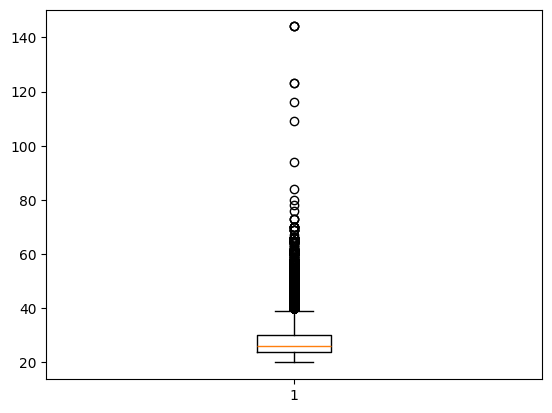

In [5]:
# Boxplot:
plt.boxplot(df[['person_age']])
plt.show()

In [63]:
# Isolation forest
model = IsolationForest(n_estimators=100, max_samples=256, contamination=0.0005, random_state=42)
model.fit(df[['person_age']])

IsolationForest(contamination=0.0005, max_samples=256, random_state=42)

In [64]:
df['scores']=model.decision_function(df[['person_age']])
df['anomaly']=model.predict(df[['person_age']])
df[['person_age', 'scores', 'anomaly']].head()

,person_age,scores,anomaly
0,22.0,0.325942,1
1,21.0,0.191301,1
2,25.0,0.357275,1
3,23.0,0.355623,1
4,24.0,0.361822,1


In [65]:
anomaly=df[['person_age', 'scores','anomaly']].loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

       person_age    scores  anomaly
81          144.0 -0.003305       -1
183         144.0 -0.003305       -1
575         123.0 -0.003305       -1
747         123.0 -0.003305       -1
32297       144.0 -0.003305       -1
32416        94.0 -0.003305       -1
37930       116.0 -0.003305       -1
38113       109.0 -0.003305       -1


In [66]:
outliers_counter = len(df[df['person_age'] > 100])
outliers_counter

7

In [67]:
print("Accuracy percentage:", 100*list(df['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 114.28571428571429


In [ ]:
# Merge data
df = df.loc[df['anomaly']!=-1]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,scores,anomaly
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,0.325942,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0.191301,1
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0.357275,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,0.355623,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,0.361822,1


In [ ]:
df = df.drop(columns = ['scores', 'anomaly'])

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## Transform data

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
dummy_person_gender = pd.get_dummies(df['person_gender'], dtype=int)
dummy_person_gender.rename(columns={'female':'gender_female', 'male':'gender_male'}, inplace=True)
dummy_person_gender.head()

,gender_female,gender_male
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [86]:
dummy_person_education = pd.get_dummies(df['person_education'], dtype=int)
dummy_person_education.rename(columns={'Associate':'edu_associate',	
                                       'Bachelor':'edu_bachelor', 
                                       'Doctorate':'edu_doctorate', 
                                       'High School':'edu_highschool',	
                                       'Master':'edu_master'}, inplace=True)
dummy_person_education.head()

,edu_associate,edu_bachelor,edu_doctorate,edu_highschool,edu_master
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,0,1


In [89]:
dummy_home_ownership = pd.get_dummies(df['person_home_ownership'], dtype = int)
dummy_home_ownership.rename(columns={'MORTGAGE':'ownership_mortgage',	
                                     'OTHER':'ownership_other',	
                                     'OWN':'ownership_own',	
                                     'RENT': 'ownership_rent'}, inplace=True)
dummy_home_ownership.head()

,ownership_mortgage,ownership_other,ownership_own,ownership_rent
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [92]:
dummy_loan_intent = pd.get_dummies(df['loan_intent'], dtype=int)
dummy_loan_intent.rename(columns={'DEBTCONSOLIDATION':'intent_debtconsolidation',
                                  	'EDUCATION':'intent_education',
                                    'HOMEIMPROVEMENT':'intent_homeimprovement',
                                    'MEDICAL':'intent_medical',
                                    'PERSONAL':'intent_personal',
                                    'VENTURE':'intent_venture'}, inplace=True)
dummy_loan_intent.head()

,intent_debtconsolidation,intent_education,intent_homeimprovement,intent_medical,intent_personal,intent_venture
0,0,0,0,0,1,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [94]:
dummy_loan_default = pd.get_dummies(df['previous_loan_defaults_on_file'], dtype=int)
dummy_loan_default.rename(columns={'No':'previous_loan_default_no', 'Yes':'previous_loan_default_yes'}, inplace=True)
dummy_loan_default.head()

,previous_loan_default_no,previous_loan_default_yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [95]:
df = pd.concat([df, dummy_home_ownership, dummy_loan_default, dummy_loan_intent,
                dummy_person_education, dummy_person_gender], axis=1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [98]:
df = df.drop(columns={'person_gender', 'person_education', 
                      'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'})
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,ownership_mortgage,...,intent_medical,intent_personal,intent_venture,edu_associate,edu_bachelor,edu_doctorate,edu_highschool,edu_master,gender_female,gender_male
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,...,0,1,0,0,0,0,0,1,1,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,...,0,0,0,0,0,0,1,0,1,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,1,...,1,0,0,0,0,0,1,0,1,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,...,1,0,0,0,1,0,0,0,1,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,0,...,1,0,0,0,0,0,0,1,0,1


## Classification task  
HOW CAN WE AUTOMATICALLY PROVIDE THE APPROVAL FOR THE POTENTIAL APPLICANTS?

In [99]:
features = df.drop('loan_status', axis=1)
target = df['loan_status']

# split the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)


In [105]:
# Fitting and Evaluating the Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(features_train, target_train)

RandomForestClassifier()

In [106]:
target_pred = rf_model.predict(features_test)

In [107]:
accurary = accuracy_score(target_test, target_pred)
print('Accuracy:', accurary)

Accuracy: 0.9272222222222222


### Visualizing the result

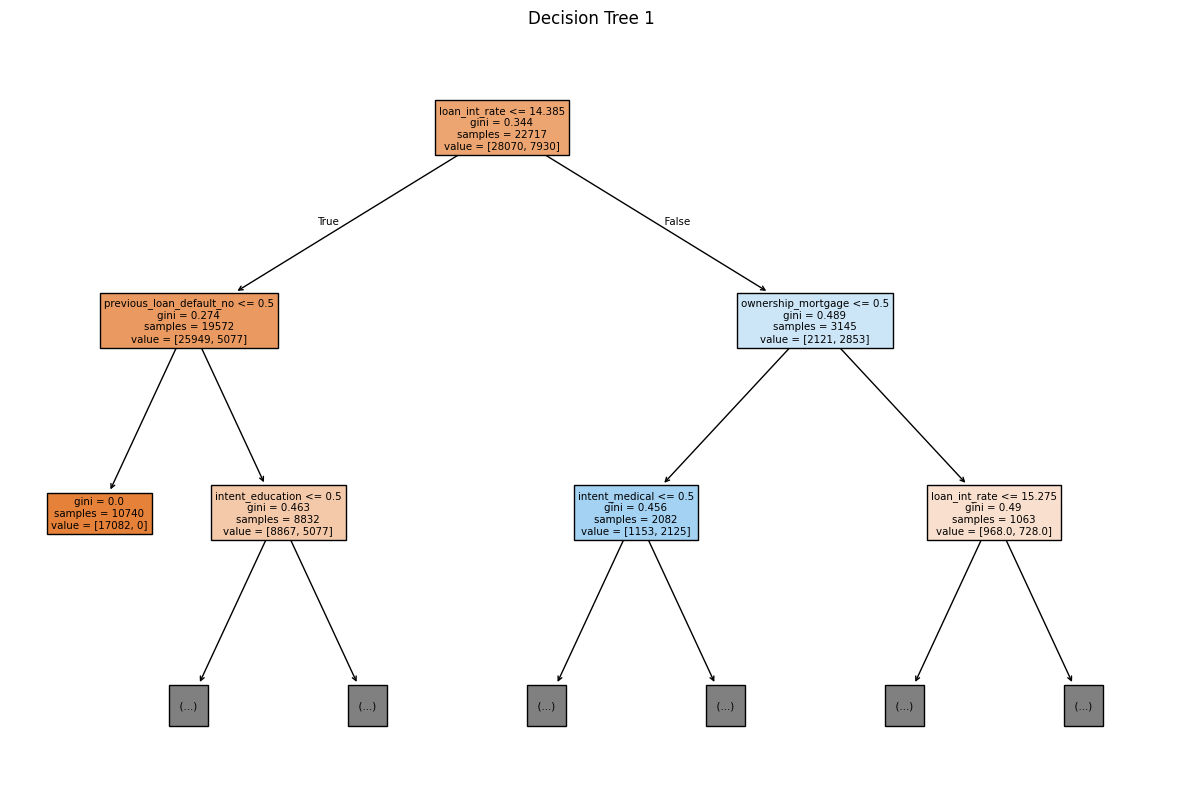

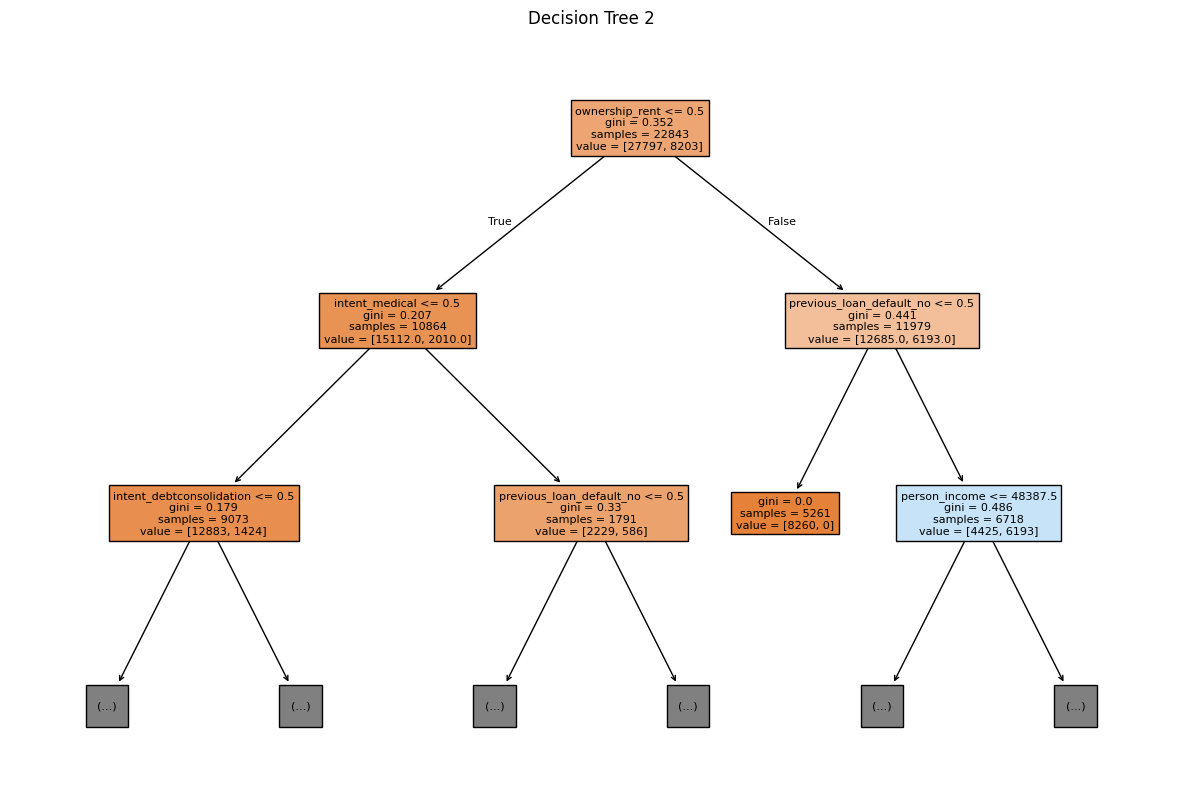

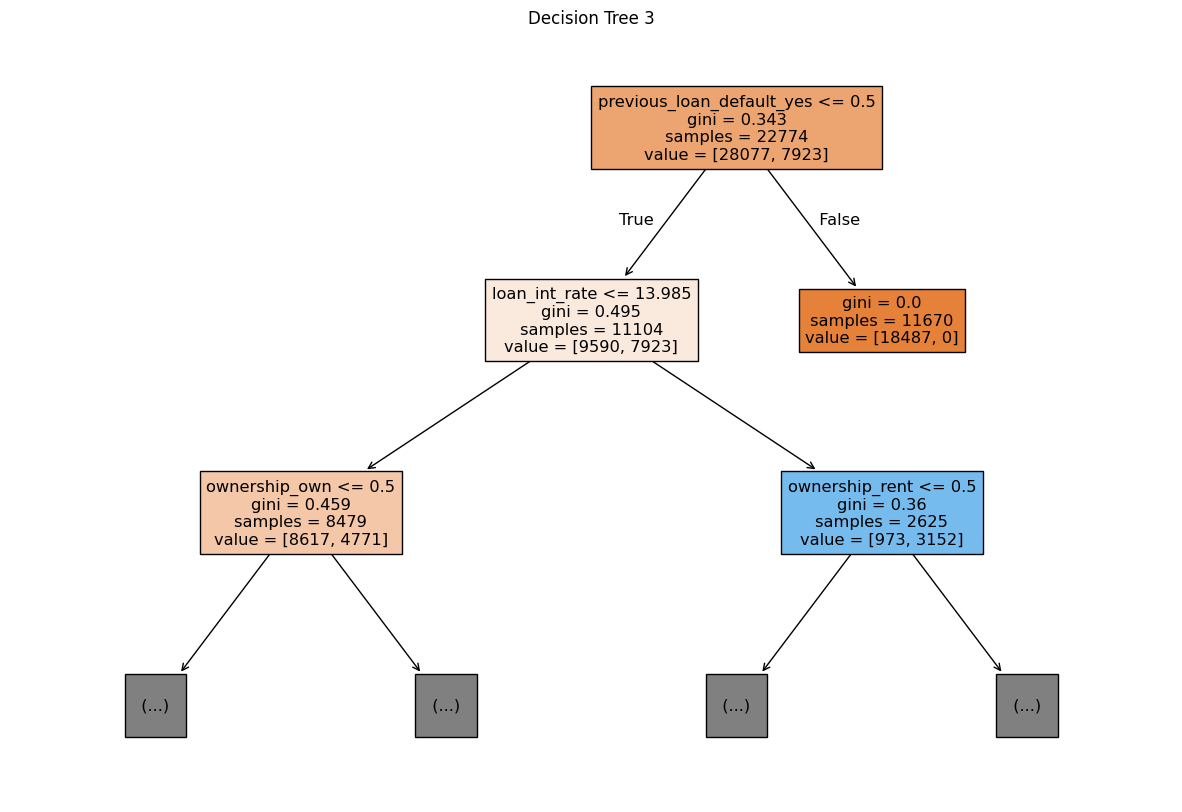

In [113]:
for i in range(3):
    tree = rf_model.estimators_[i]
    
    plt.figure(figsize=(15, 10))
    plot_tree(
        tree,
        feature_names=features_train.columns,
        filled=True,
        max_depth=2  # Limit depth for better visualization
    )
    plt.title(f"Decision Tree {i+1}")
    plt.show()

## Hyperparameter Tuning

In [115]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(features_train, target_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D4D40ECC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D450002F0>})

In [116]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 424}


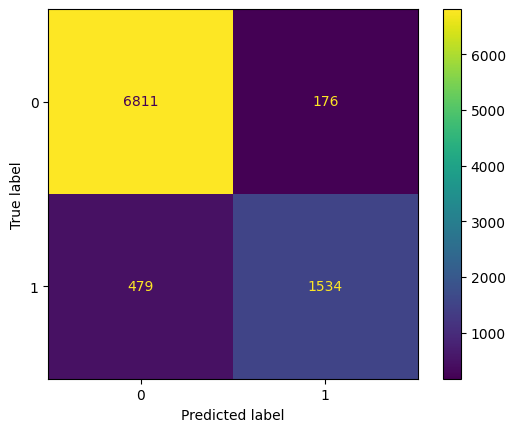

In [117]:
# Generate predictions with the best model
y_pred = best_rf.predict(features_test)

# Create the confusion matrix
cm = confusion_matrix(target_test, target_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [118]:

accuracy = accuracy_score(target_test, target_pred)
precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9272222222222222
Precision: 0.8970760233918129
Recall: 0.762046696472926


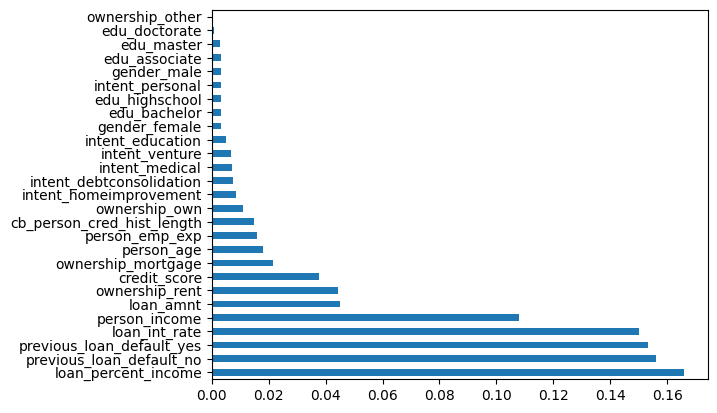

In [120]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=features_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.barh();